# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [12]:
sinasc_ro_2019 = pd.read_csv(
    'sinasc_ro_2019.csv')
sinasc_ro_2019.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [13]:
sinasc_ro_2019['APGAR5'].isnull().sum()


103

In [14]:
sinasc_ro_2019['APGAR5'].dropna()

0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
27023     9.0
27024     9.0
27025    10.0
27026     9.0
27027     8.0
Name: APGAR5, Length: 26925, dtype: float64

In [15]:
sinasc_ro_2019.loc[sinasc_ro_2019['APGAR5'] <= 3, 'Ind_Asfixia'] = 'Asfixia Severa'
sinasc_ro_2019.loc[(sinasc_ro_2019['APGAR5'] > 3) & (sinasc_ro_2019['APGAR5'] <= 5),
           'Ind_Asfixia'] = 'Asfixia Moderada'
sinasc_ro_2019.loc[(sinasc_ro_2019['APGAR5'] > 5) & (sinasc_ro_2019['APGAR5'] <= 7),
           'Ind_Asfixia'] = 'Asfixia Leve'
sinasc_ro_2019.loc[(sinasc_ro_2019['APGAR5'] > 7), 'Ind_Asfixia'] = 'Normal'

<AxesSubplot:xlabel='Ind_Asfixia', ylabel='count'>

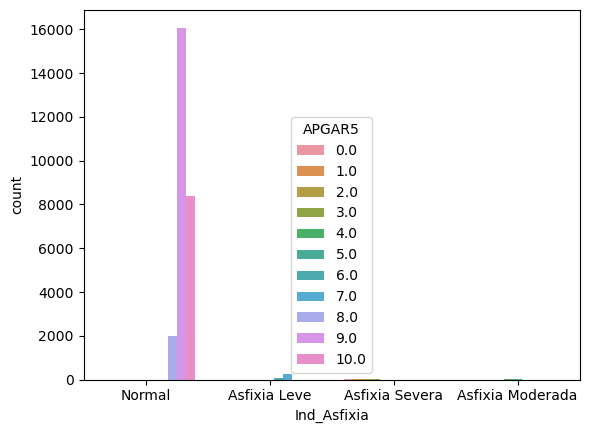

In [19]:
sns.countplot(x='Ind_Asfixia'
              , hue = 'APGAR5'
              , data=sinasc_ro_2019
             )

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

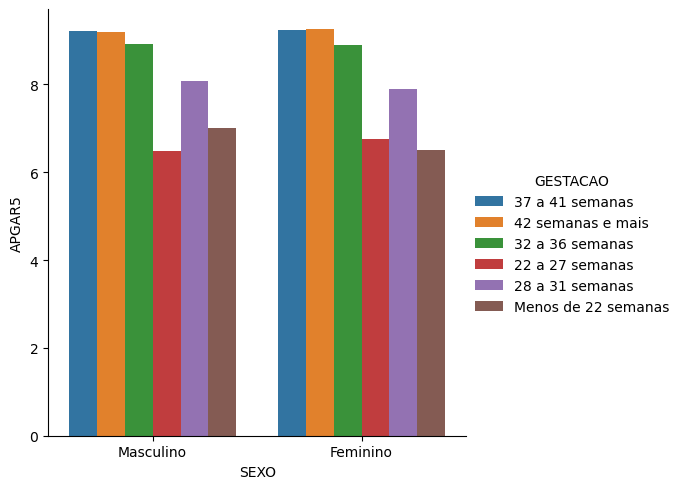

In [20]:
sns.catplot(x='SEXO', y='APGAR5'
            , hue = 'GESTACAO'
            , kind='bar'
            , data=sinasc_ro_2019
            , ci = None
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [21]:
freq = pd.crosstab(sinasc_ro_2019['GESTACAO'], sinasc_ro_2019['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [22]:
freq.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [23]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [24]:
freq_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

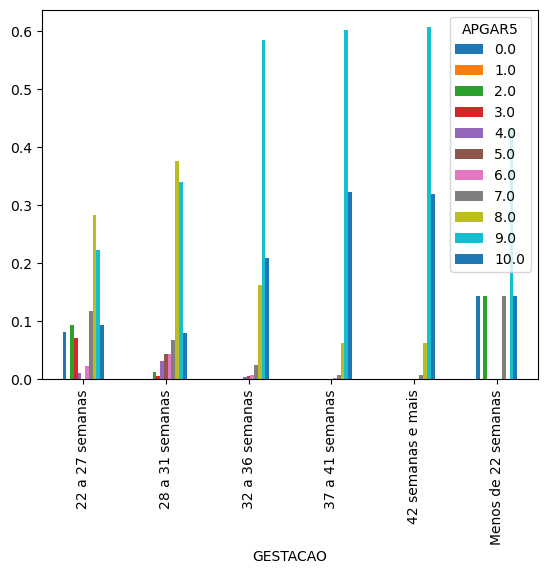

In [25]:
freq_pctlin.plot.bar()

Levando em consideração apenas o APGAR5 não é possível concluir a fase prématura de um bebê. De acordo com o relatório o APGAR5 só revela uma queda significativa abaixo de 32 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

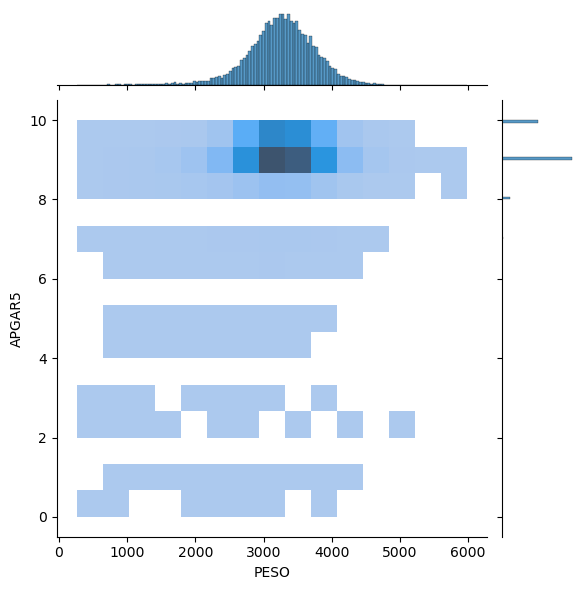

In [27]:
sns.jointplot(x = 'PESO'
              , y = 'APGAR5'
              , data = sinasc_ro_2019
              , kind="hist"
              , bins = [15, 15])

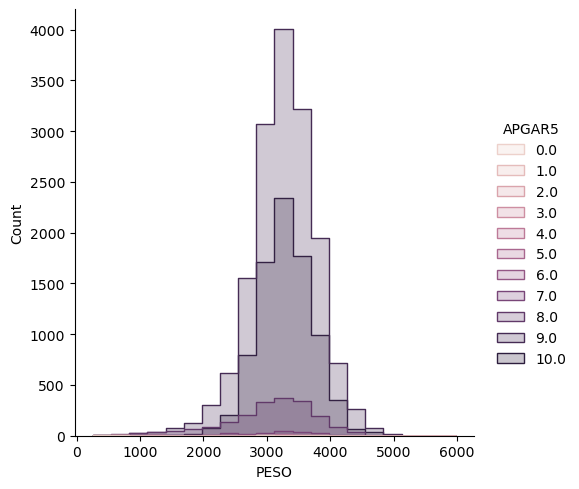

In [36]:
sns.displot(data = sinasc_ro_2019
            ,x = 'PESO'
            ,hue = 'APGAR5'
            ,bins = 20
            ,element = 'step'
           )

Espera-se, de acordo com a Sociedade Brasileira de Pediatria, que um recém-nascido tenha entre 2,5kg e 3,9kg.

Logo, de acordo coma  análise gráfica acima, podemos concluir que o APGAR5 tem uma relação direta com o peso do recém nascido. Ou seja, um apgar5 considerado normal se enquadra na faixa de peso "ideal" indicado pela Sociedade Brasileira de Pediatria.